In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import numpy as np

In [2]:
#設定numpy隨機亂樹的種子
np.random.seed(10)

#讀取乳腺癌資料集，訓練集(x_train, y_train)和測試集(x_test, y_test)
data = load_breast_cancer()
X, y = data.data, data.target

#拆分訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [3]:
#轉換資料為4維架構(灰階設1個通道)
#x_train.shape[0]是訓練集樣本數，x_train.shape[1]是特徵數量
#reshape()將原始的2维數據重新排列成4维的架構
#每个樣本形狀設置為(特徵數量, 1, 1)，即每个特徵作為一个通道
#astype('float32')數據類型轉換浮點型
x_train4D = x_train.reshape(x_train.shape[0], x_train.shape[1], 1, 1).astype('float32') 
x_test4D = x_test.reshape(x_test.shape[0], x_test.shape[1], 1, 1).astype('float32')

In [4]:
#將數據進行標準化，將數據標準化到0到1的範圍
x_train4D_norm = x_train4D / 255 
x_test4D_norm = x_test4D /255 

In [5]:
#將標籤Label做Onehot-encoding
#計算標籤的類別數量
num_classes = np.max(y_train) + 1
#將標籤進行Onehot-encoding，使標籤轉換為二進制矩陣
y_trainOneHot = to_categorical(y_train, num_classes)
y_testOneHot = to_categorical(y_test, num_classes)

In [6]:
#建立卷積層與池化層
#Sequential：用於建構順序模型。
from keras.models import Sequential
#建構神經網路
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#初始化一個Sequential模型
model = Sequential()

#加上卷積第一層 CN layer 1
#使用16個卷積核
#卷積核大小為5*1
#使用padding='same'，輸出尺寸與輸入相同
#輸入形狀為30*1*1，30個特徵，單通道
#使用relu激活函數
model.add(Conv2D(filters=16,
                 kernel_size=(5, 1),
                 padding='same',
                 input_shape=(30, 1, 1),
                 activation='relu',
                 name='conv2d_1'))

#加上池化層 Pooling layer 1
#池化大小2*1
model.add(MaxPooling2D(pool_size=(2, 1), name='maxpool2d_1'))

#展平層 Flatten layer
#將多維輸入展平成一維
model.add(Flatten())

#全連階層 Dense layer
#全連接層的神經元個數為128
#relu激活函數
#添加Dropout層，防止太相似
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5))

#輸出層 Output layer
#輸出層的神經元個數等於類別數
#softmax激活函数，用於多分類任務
model.add(Dense(num_classes, activation='softmax', name='output'))

#印出摘要
model.summary()

C:\Users\PAN\.conda\envs\notebook\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 1, 16)           │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool2d_1 (MaxPooling2D)           │ (None, 15, 1, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          30,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,202 (121.88 KB)

 Trainable params: 31,202 (121.88 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#定義訓練方式，定義模型的損失函数、優化器和評估指標
#loss: 設定 Loss Function, 這邊選定 Cross Entropy 作為 Loss Function.
#optimizer: 設定訓練時的優化方法, 在深度學習使用 adam (Adam: A Method for Stoch
#metrics: 設定評估模型的方式是 accuracy 準確率.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#開始訓練
#將資料進行標準化，使其值在 [0, 1] 範圍內。
x_train4D_norm = x_train4D / np.max(x_train4D)
x_test4D_norm = x_test4D / np.max(x_test4D)

#訓練模型
#validation_split: 驗證集的比例
#設置驗證集比例為20%，訓練周期為10個，每批次30個樣本，輸出訓練進度
#epochs: 訓練周期
#batch_size: 每一批次多少筆資料
train_history = model.fit(x=x_train4D_norm, 
                          y=y_trainOneHot, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=30, 
                          verbose=1)

#訓練步驟產生的 accuracy 與 loss 都會記錄在 train_history 變數

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5265 - loss: 0.6821 - val_accuracy: 0.8681 - val_loss: 0.6568
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8563 - loss: 0.6501 - val_accuracy: 0.8571 - val_loss: 0.6189
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8907 - loss: 0.6041 - val_accuracy: 0.8352 - val_loss: 0.5572
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.5381 - val_accuracy: 0.8242 - val_loss: 0.4808
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8648 - loss: 0.4651 - val_accuracy: 0.8462 - val_loss: 0.4174
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8698 - loss: 0.4144 - val_accuracy: 0.8462 - val_loss: 0.3698
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8674 - loss: 0.3686 - val_accuracy: 0.8462 - val_loss: 0.3358
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9067 - loss: 0.2948 - val_accuracy: 0.8571 - val_loss

In [8]:
import matplotlib.pyplot as plt

#畫出訓練步驟產生的accuracy或loss記錄
def show_train_history(train_history, train, validation): 
    #從train_history中提取驗證集對應指標的值
    plt.plot(train_history.history[train]) 
    plt.plot(train_history.history[validation]) 
    plt.title('Train History') 
    plt.ylabel(train) 
    plt.xlabel('Epoch') 
    plt.legend(['train', 'validation'], loc='upper left') 
    plt.show() 

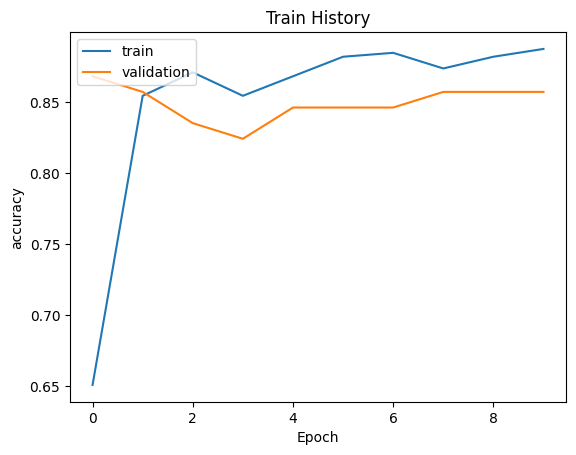

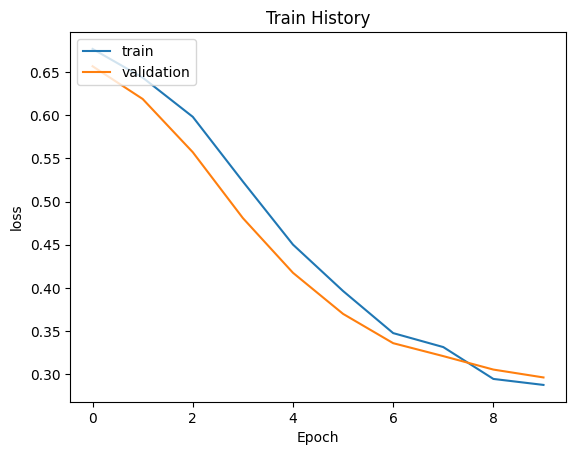

In [9]:
#使用函數show_train_history顯示accuracy在train與validation的差異與loss的變化
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [10]:
#評估模型準確率與進行預測
#使用model.evaluate測試資料集來評估模型性能
#scores包含評估結果，包含損失值和準確率
scores = model.evaluate(x_test4D_norm, y_testOneHot) 
print() 
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8961 - loss: 0.2659 

[Info] Accuracy of testing data = 88.6%


In [11]:
#預測結果
print("[Info] Making prediction of x_test4D_norm") 
#使用model.predict對標準化後的測試數據x_test4D_norm進行預測，返回每個樣本的類別概率
prediction = model.predict(x_test4D_norm)
#將預測的概率轉換為具體的類別，找到概率最高的類別
prediction = np.argmax(prediction, axis=1)
print() 
#因為這是非圖像數據集，我們不會顯示圖像，但可以顯示預測的結果和真實標籤
print("[Info] Show 10 actual results (from 0 to 10):") 
print("%s\n" % (y_test[0:10]))

[Info] Making prediction of x_test4D_norm
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

[Info] Show 10 actual results (from 0 to 10):
[1 0 0 1 1 0 0 0 1 1]

